# wechaty+paddlehub实现微信机器人黑白照片的上色

![](https://ai-studio-static-online.cdn.bcebos.com/2676c222df644a26855a680babec16b9a471523f6bca41d883548eca5f6b2f8b)


# paddlehub 中 deoldify库 的使用

官方文档[deoldify库](http://www.paddlepaddle.org.cn/hubdetail?name=deoldify&en_category=ImageEditing)

In [1]:
# 具体实现说明，必须将paddlehub升级到最新，否则会报如下错误
'''File "D:\Anaconda_data\envs\pd_2_cpu\lib\site-packages\paddlehub\module\module.py", line 80, in _wrapper
raise RuntimeError
RuntimeError

Process finished with exit code 1


https://github.com/paddlepaddle/paddlehub/issues/1119

'''

!pip install --upgrade paddlehub  # aistudio里已经安装了paddle2.0和paddlehub了，如果本地运行需要安装这两个库

Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 211 kB 18.0 MB/s eta 0:00:01
     |████████████████████████████████| 93 kB 3.6 MB/s  eta 0:00:01
  Attempting uninstall: paddlehub
    Found existing installation: paddlehub 2.0.4
    Uninstalling paddlehub-2.0.4:
      Successfully uninstalled paddlehub-2.0.4
You should consider upgrading via the '/opt/conda/envs/python35-paddle120-env/bin/python -m pip install --upgrade pip' command.


In [2]:
!hub install deoldify==1.0.1  #安装deoldify

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/setuptools/depends.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is depre

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized


load pretrained checkpoint success


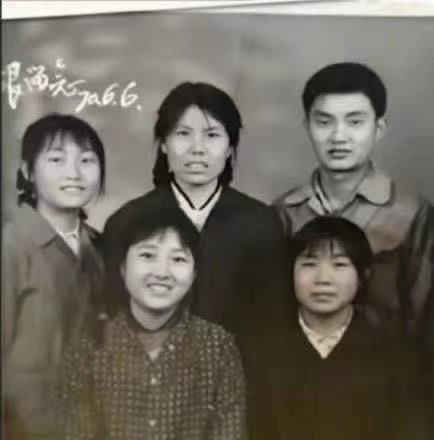

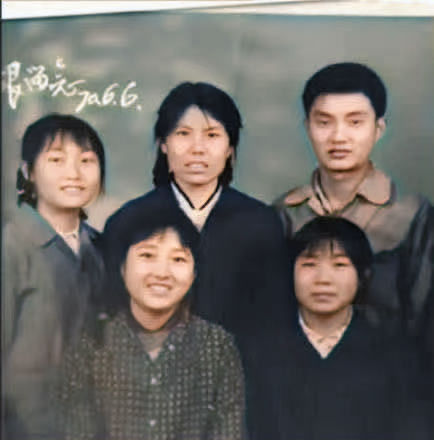

In [3]:
import paddlehub as hub
from PIL import Image

# 加载模型
model = hub.Module(name='deoldify')

# 设置输入图像路径
input_img = 'lihuanying.jpg' #同目录下放入照片，照片名字自行修改

# 模型预测
result = model.predict(input_img)

# 获取输出图像路径
output_img = result[1]

# 显示图像
display(Image.open(input_img))
display(Image.open(output_img))

#与wechaty的结合制作机器人

建议查看一下文件

[教你用AI Studio+wechaty+阿里云白嫖一个智能微信机器人](https://aistudio.baidu.com/aistudio/projectdetail/1836012?channelType=0&channel=0)

# run.sh

In [4]:
# coding=utf-8

######  欢迎使用脚本任务，首先让我们熟悉脚本任务的一些使用规则  ######
# 脚本任务支持两种运行方式 

# 1.shell 脚本. 在 run.sh 中编写项目运行时所需的命令，并在启动命令框中填写 bash run.sh <参数1> <参数2>使脚本任务正常运行.

# 2.python 指令. 在 run.py 编写运行所需的代码，并在启动命令框中填写 python run.py <参数1> <参数2> 使脚本任务正常运行.

#注：run.sh、run.py 可使用自己的文件替代。

###数据集文件目录
# datasets_prefix = '/root/paddlejob/workspace/train_data/datasets/'

# 数据集文件具体路径请在编辑项目状态下通过左侧导航「数据集」中文件路径拷贝按钮获取
# train_datasets =  '通过路径拷贝获取真实数据集文件路径 '

# 输出文件目录. 任务完成后平台会自动把该目录所有文件压缩为tar.gz包，用户可以通过「下载输出」可以将输出信息下载到本地.
# output_dir = "/root/paddlejob/workspace/output"

# 日志记录. 任务会自动记录环境初始化日志、任务执行日志、错误日志、执行脚本中所有标准输出和标准出错流(例如print()),用户可以在「提交」任务后,通过「查看日志」追踪日志信息.
pip install --upgrade pip
pip install --upgrade paddlehub
pip install wechaty==0.7dev17
hub install deoldify==1.0.1



# 设置环境变量
export WECHATY_PUPPET_SERVICE_TOKEN=puppet_padlocal_df5c9d2a0b6d4aad9eec38bdf9ccf21b
export WECHATY_PUPPET_HOSTIE_TOKEN=puppet_padlocal_df5c9d2a0b6d4aad9eec38bdf9ccf21b

# 设置使用GPU进行模型预测
export CUDA_VISIBLE_DEVICES=0

# 创建两个保存图片的文件夹
mkdir -p image
mkdir -p image-new



# 运行python文件
python run.py

SyntaxError: invalid syntax (<ipython-input-4-05e31940d0e3>, line 22)

# run.py

In [ ]:
# coding=utf-8

######  欢迎使用脚本任务，首先让我们熟悉脚本任务的一些使用规则  ######
# 脚本任务支持两种运行方式 

# 1.shell 脚本. 在 run.sh 中编写项目运行时所需的命令，并在启动命令框中填写 bash run.sh <参数1> <参数2>使脚本任务正常运行.

# 2.python 指令. 在 run.py 编写运行所需的代码，并在启动命令框中填写 python run.py <参数1> <参数2> 使脚本任务正常运行.

#注：run.sh、run.py 可使用自己的文件替代。

###数据集文件目录
# datasets_prefix = '/root/paddlejob/workspace/train_data/datasets/'

# 数据集文件具体路径请在编辑项目状态下通过左侧导航「数据集」中文件路径拷贝按钮获取
# train_datasets =  '通过路径拷贝获取真实数据集文件路径 '

# 输出文件目录. 任务完成后平台会自动把该目录所有文件压缩为tar.gz包，用户可以通过「下载输出」可以将输出信息下载到本地.
# output_dir = "/root/paddlejob/workspace/output"

# 日志记录. 任务会自动记录环境初始化日志、任务执行日志、错误日志、执行脚本中所有标准输出和标准出错流(例如print()),用户可以在「提交」任务后,通过「查看日志」追踪日志信息.

import os
import cv2
import asyncio
import numpy as np
import paddlehub as hub

model = hub.Module(name='deoldify')


from wechaty import (
    Contact,
    FileBox,
    Message,
    Wechaty,
    ScanStatus,
)






def img_transform(img_path, img_name):
    """
    老照片上色
    img_path: 图片的路径
    img_name: 图片的文件名
    """
    # 图片转换后存放的路径
    img_new_path = './image-new/' + img_name

    # 模型预测
    
    
    
    result = model.predict(img_path)

    # 将图片保存到指定路径
    cv2.imwrite(img_new_path, result[0])  #注意这里是result[0] 不能按上面result[1]

    # 返回新图片的路径
    return img_new_path

async def on_message(msg: Message):
    
    contact=msg.talker()
    
    

    if msg.text() == 'hi' or msg.text() == '你好':
        await msg.say('这是自动回复: 机器人目前的功能是：收到一张黑白老照片, 自动帮你上色哦\n ')
        
    
    
    
    if '@徐嫣琼' in msg.text() or '@diandian16' in msg.text() :
        await contact.say('请发我一张老照片吧，我帮你上色哦！')
        
        
    if msg.text() == '周深':
        url = 'https://z3.ax1x.com/2021/04/27/gC0EtA.jpg'
        file_box_11 = FileBox.from_url(url=url, name='xx.jpg')

        await msg.say(file_box_11)
    
    if msg.text() == '费玉清'or msg.text() == '小哥' :
        url = 'https://z3.ax1x.com/2021/04/27/gCBeUJ.jpg'
        
        # 构建一个FileBox
        file_box_1 = FileBox.from_url(url=url, name='xx.jpg')

        await msg.say(file_box_1)
        
        
    # 如果收到的message是一张图片
    
    if msg.type() == Message.Type.MESSAGE_TYPE_IMAGE:

        # 将Message转换为FileBox
        file_box_2 = await msg.to_file_box()

        # 获取图片名
        img_name = file_box_2.name

        # 图片保存的路径
        img_path = './image/' + img_name

        # 将图片保存为本地文件
        await file_box_2.to_file(file_path=img_path)

        # 调用图片风格转换的函数
        img_new_path = img_transform(img_path, img_name)
        

        # 从新的路径获取图片
        file_box_3 = FileBox.from_file(img_new_path)
        
        await msg.say(file_box_3)
    
    
        
        


async def on_scan(
        qrcode: str,
        status: ScanStatus,
        _data,
):
    print('Status: ' + str(status))
    print('View QR Code Online: https://wechaty.js.org/qrcode/' + qrcode)


async def on_login(user: Contact):
    print(user)


async def main():
    # 确保我们在环境变量中设置了WECHATY_PUPPET_SERVICE_TOKEN
    if 'WECHATY_PUPPET_SERVICE_TOKEN' not in os.environ:
        print('''
            Error: WECHATY_PUPPET_SERVICE_TOKEN is not found in the environment variables
            You need a TOKEN to run the Python Wechaty. Please goto our README for details
            https://github.com/wechaty/python-wechaty-getting-started/#wechaty_puppet_service_token
        ''')

    bot = Wechaty()

    bot.on('scan',      on_scan)
    bot.on('login',     on_login)
    bot.on('message',   on_message)

    await bot.start()

    print('[Python Wechaty] Ding Dong Bot started.')


asyncio.run(main())

# 后记与参考文献

paddlehub的库真的挺多的，可以一个个尝试，通过尝试还发现，这个模块除了能给黑白照片上色，好像还可以给彩色照片去色，具体建议大家多多尝试

参考文献：

[PaddleHub：一张黑白老照片的奇妙之旅](https://aistudio.baidu.com/aistudio/projectdetail/1264565?channelType=0&channel=0) 

[教你用AI Studio+wechaty+阿里云白嫖一个智能微信机器人](https://aistudio.baidu.com/aistudio/projectdetail/1836012?channelType=0&channel=0)



